In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Membuat objek ImageDataGenerator dengan beberapa konfigurasi augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.45,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

In [4]:
import matplotlib.image as mpig
import os

In [5]:
IMG_PATH = 'buah'
img_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0.45,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

In [6]:
img_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,

    # Parameter untuk menyimpan data (Pastikan folder 'augmented' telah dibuat)
    class_mode='categorical',
    save_to_dir='augmented',
    save_prefix='aug',
    save_format='jpg'
)
for i in range(5):
    img_generator.next()


Found 302 images belonging to 3 classes.


In [7]:
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)
validation_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 242 images belonging to 3 classes.


Found 60 images belonging to 3 classes.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', # 256 = Ini terserah aja mau berapa, tapi saran bang gial itu mulai dari yang terkecil baru ke terbesar dan juga pakai kelipatan (4, 16, 32, 64, 128, 256)
    input_shape=[150,150,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
hasil = model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.1244 - accuracy: 0.4463 - val_loss: 1.1432 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 12s 1s/step - loss: 0.9069 - accuracy: 0.5372 - val_loss: 0.8068 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.6251 - accuracy: 0.7562 - val_loss: 0.4679 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.3869 - accuracy: 0.8512 - val_loss: 0.3846 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.3138 - accuracy: 0.8967 - val_loss: 0.3847 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 0.2717 - accuracy: 0.9256 - val_loss: 0.4292 - val_accuracy: 0.8333
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.2523 - accuracy: 0.9091 - val_loss: 0.5318 - val_accuracy: 0.8667
Epoch 8/10
8/8 [==================

# Accuracy


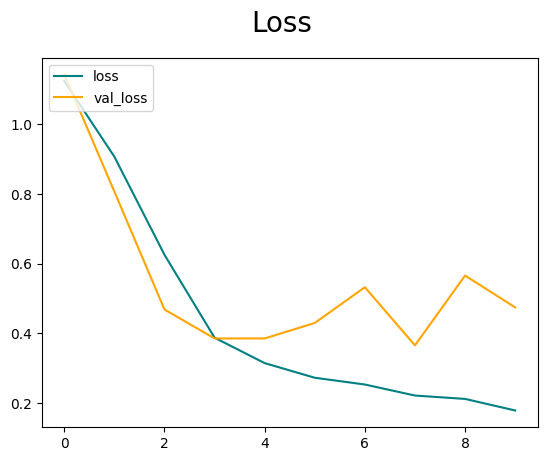

In [11]:
fig = plt.figure()
plt.plot(hasil.history['loss'], color='teal', label='loss')
plt.plot(hasil.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

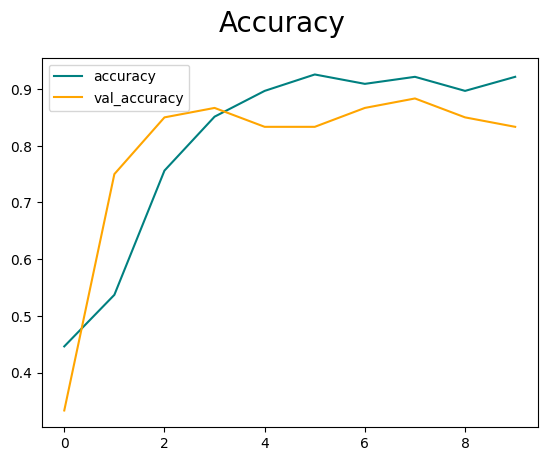

In [12]:
fig = plt.figure()
plt.plot(hasil.history['accuracy'], color='teal', label='accuracy')
plt.plot(hasil.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
# save the model
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
model.save('model-bw.h5')

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
class_indices = train_generator.class_indices
class_names = sorted(class_indices, key=class_indices.get)

In [15]:
class_names

['Alpukat', 'Apel', 'Pisang']

In [16]:
os.listdir('buah')

['Alpukat', 'Apel', 'Pisang']

In [17]:
import tensorflow as tf
from PIL import Image

# Load the image
image_path = 'buah/Pisang/Pisang_1.png'  # path gambar yang diprediksi
image = Image.open(image_path)
image = image.resize((150, 150))  # Sesuaikan ukuran gambar dengan model yang digunakan

# Convert image to RGB
image = image.convert('RGB')

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)  # Gunakan preprocess_input dari InceptionV3
image = tf.expand_dims(image, axis=0)

# Load the model

tf.keras.models.load_model('model-bw.h5')  # path model yang mau dipakai

# predictions
predictions = model.predict(image)
predicted_class = tf.argmax(predictions, axis=1)[0].numpy()

# class labels
class_labels = class_names

# Print predicted class
predicted_label = class_labels[predicted_class]
print('Predicted class:', predicted_label)

1/1 [==============================] - 0s 106ms/step
Predicted class: Pisang
